In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [4]:
data = pd.read_csv('housing.csv')

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [12]:
train_data = x_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8601,-118.37,33.88,27.0,1688.0,331.0,811.0,327.0,4.5357,<1H OCEAN,334200.0
8693,-118.33,33.86,36.0,854.0,160.0,473.0,150.0,6.3992,<1H OCEAN,259600.0
5458,-118.46,34.00,39.0,614.0,174.0,538.0,159.0,2.3542,<1H OCEAN,235700.0
13698,-117.21,34.13,31.0,3037.0,565.0,1834.0,575.0,3.3445,INLAND,92900.0
11746,-121.16,38.75,27.0,771.0,108.0,315.0,111.0,8.4882,INLAND,276600.0
...,...,...,...,...,...,...,...,...,...,...
5230,-118.24,33.93,37.0,1027.0,258.0,824.0,248.0,1.5132,<1H OCEAN,86300.0
4930,-118.25,33.99,42.0,2261.0,574.0,2496.0,527.0,1.5556,<1H OCEAN,98500.0
3695,-118.39,34.20,17.0,2594.0,1028.0,3950.0,973.0,2.0348,<1H OCEAN,177200.0
1434,-122.03,37.98,44.0,1254.0,252.0,498.0,217.0,3.4531,NEAR BAY,148900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

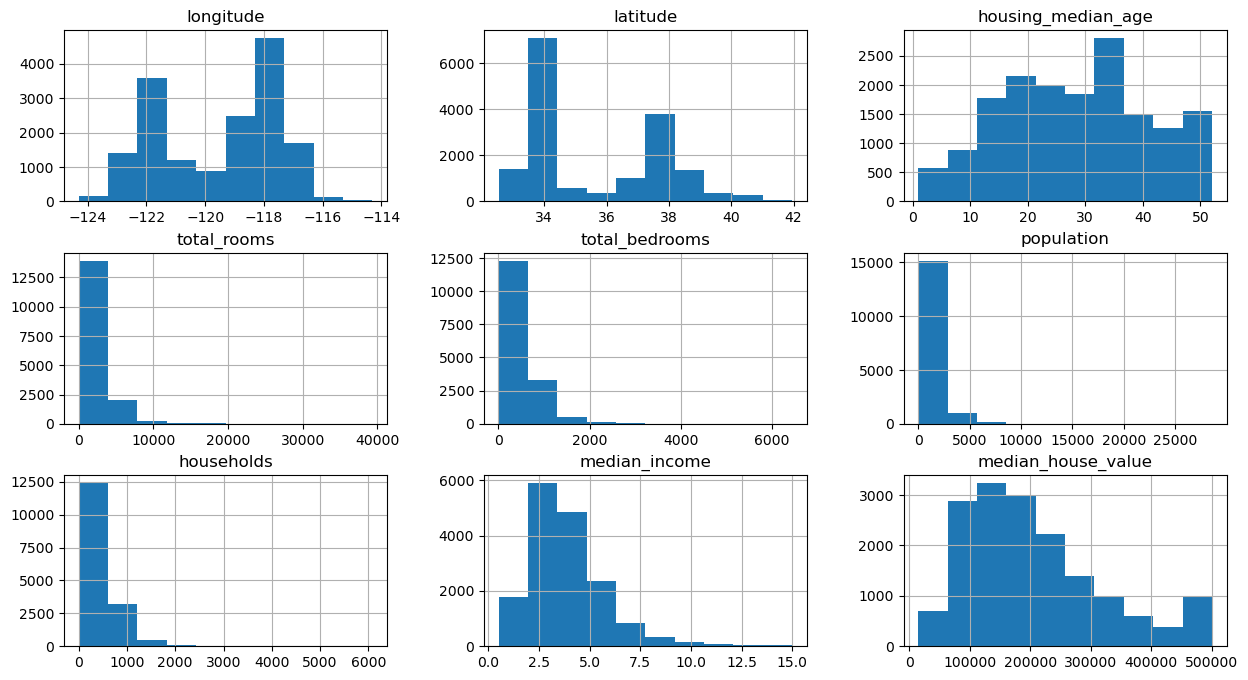

In [14]:
train_data.hist(figsize=(15, 8))

In [15]:
train_data.corr()

C:\Users\The Shalez\AppData\Local\Temp\ipykernel_12040\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924647,-0.106823,0.051827,0.074511,0.106459,0.062152,-0.012141,-0.040980
latitude,-0.924647,1.000000,0.011151,-0.043487,-0.072635,-0.116573,-0.078446,-0.083519,-0.149550
housing_median_age,-0.106823,0.011151,1.000000,-0.360557,-0.320155,-0.300973,-0.303560,-0.117753,0.109226
total_rooms,0.051827,-0.043487,-0.360557,1.000000,0.930243,0.863345,0.918161,0.196655,0.133273
total_bedrooms,0.074511,-0.072635,-0.320155,0.930243,1.000000,0.884545,0.980152,-0.008720,0.050433
population,0.106459,-0.116573,-0.300973,0.863345,0.884545,1.000000,0.912885,0.007592,-0.022497
households,0.062152,-0.078446,-0.303560,0.918161,0.980152,0.912885,1.000000,0.013011,0.065917
median_income,-0.012141,-0.083519,-0.117753,0.196655,-0.008720,0.007592,0.013011,1.000000,0.689544
median_house_value,-0.040980,-0.149550,0.109226,0.133273,0.050433,-0.022497,0.065917,0.689544,1.000000


C:\Users\The Shalez\AppData\Local\Temp\ipykernel_12040\1179452894.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

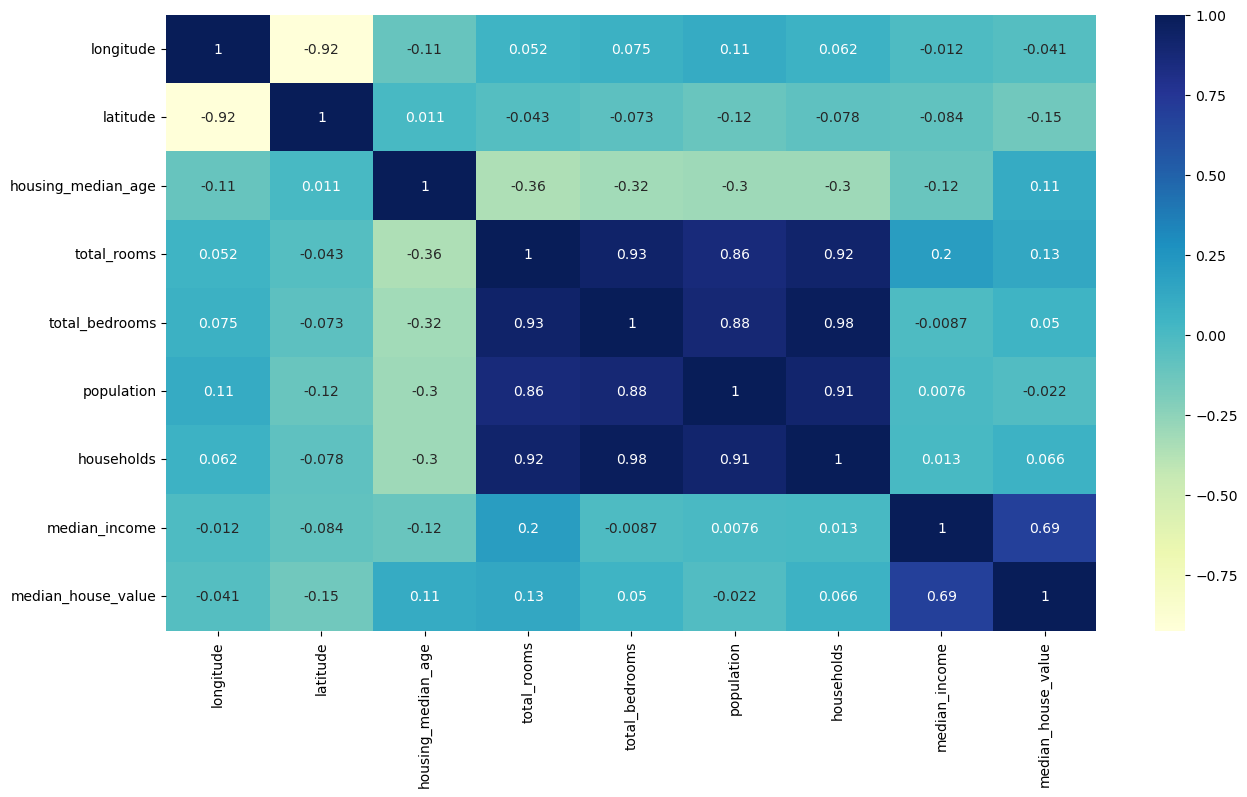

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

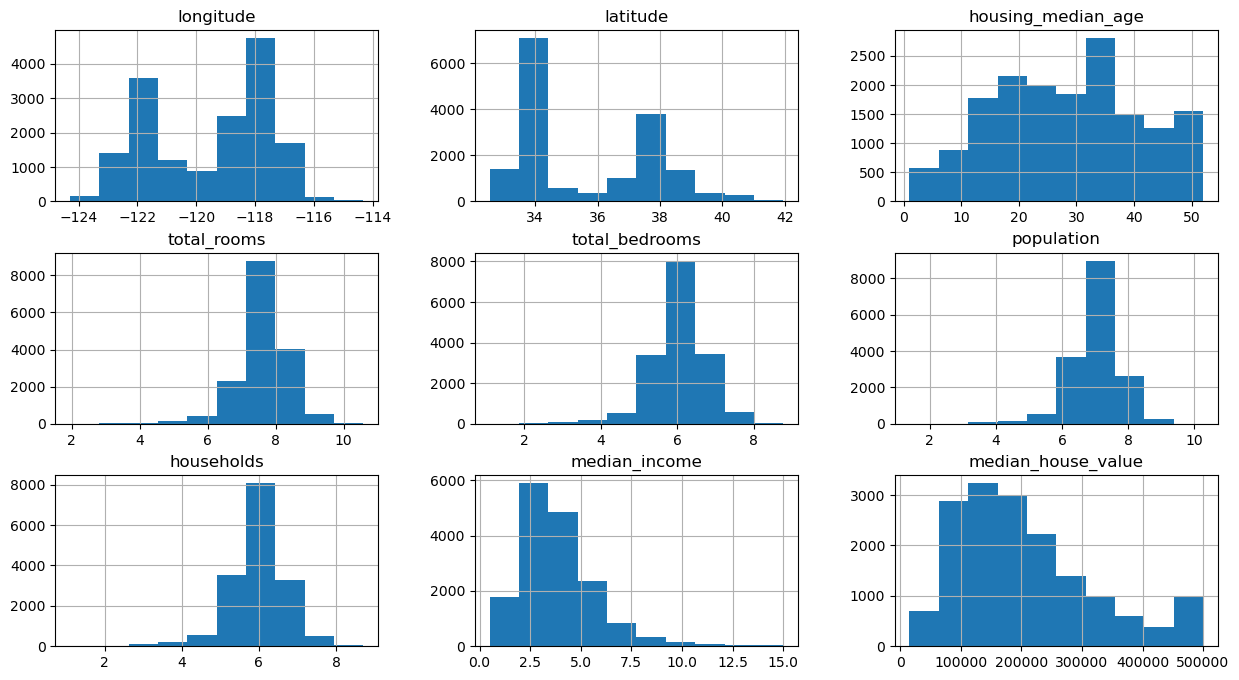

In [18]:
train_data.hist(figsize=(15, 8))

In [19]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7204
INLAND        5184
NEAR OCEAN    2113
NEAR BAY      1841
ISLAND           4
Name: ocean_proximity, dtype: int64

In [20]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8601,-118.37,33.88,27.0,7.431892,5.805135,6.699500,5.793014,4.5357,334200.0,1,0,0,0,0
8693,-118.33,33.86,36.0,6.751101,5.081404,6.161207,5.017280,6.3992,259600.0,1,0,0,0,0
5458,-118.46,34.00,39.0,6.421622,5.164786,6.289716,5.075174,2.3542,235700.0,1,0,0,0,0
13698,-117.21,34.13,31.0,8.018955,6.338594,7.514800,6.356108,3.3445,92900.0,0,1,0,0,0
11746,-121.16,38.75,27.0,6.648985,4.691348,5.755742,4.718499,8.4882,276600.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,-118.24,33.93,37.0,6.935370,5.556828,6.715383,5.517453,1.5132,86300.0,1,0,0,0,0
4930,-118.25,33.99,42.0,7.724005,6.354370,7.822845,6.269096,1.5556,98500.0,1,0,0,0,0
3695,-118.39,34.20,17.0,7.861342,6.936343,8.281724,6.881411,2.0348,177200.0,1,0,0,0,0
1434,-122.03,37.98,44.0,7.134891,5.533389,6.212606,5.384495,3.4531,148900.0,0,0,0,1,0


<Axes: >

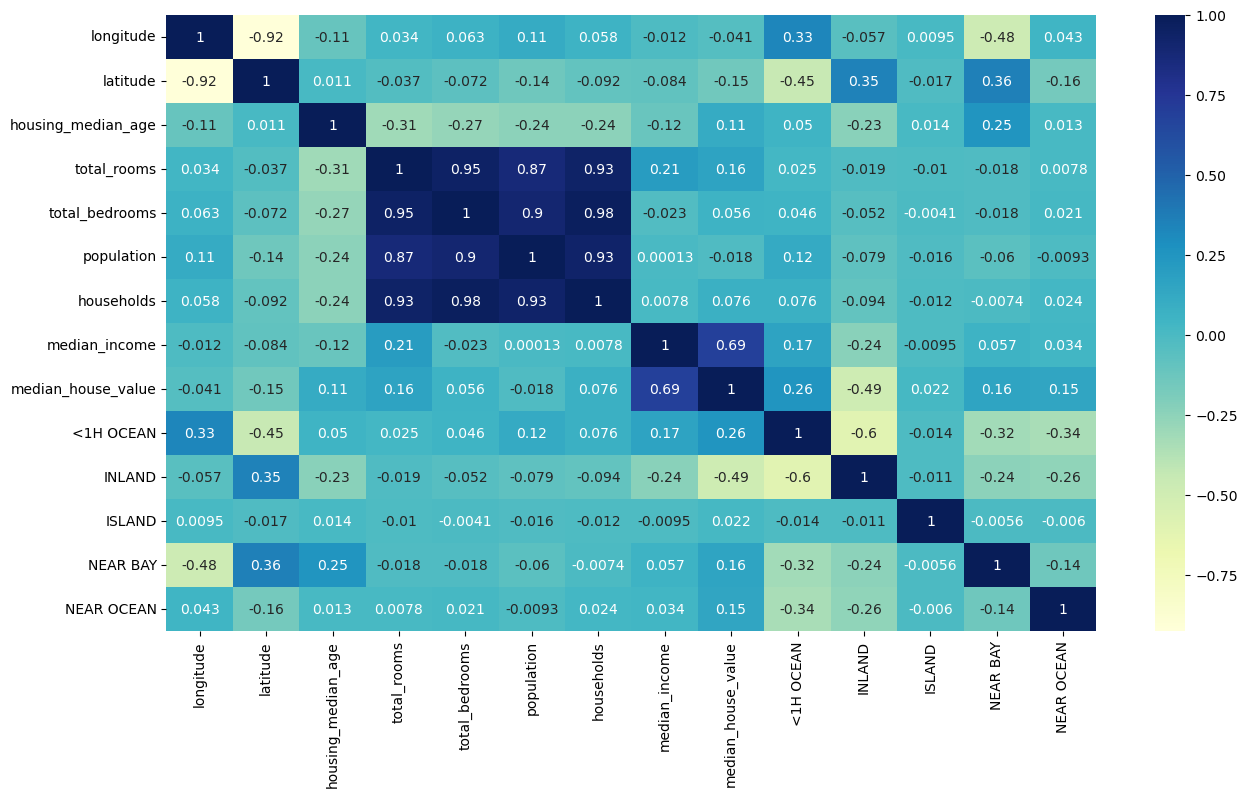

In [22]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

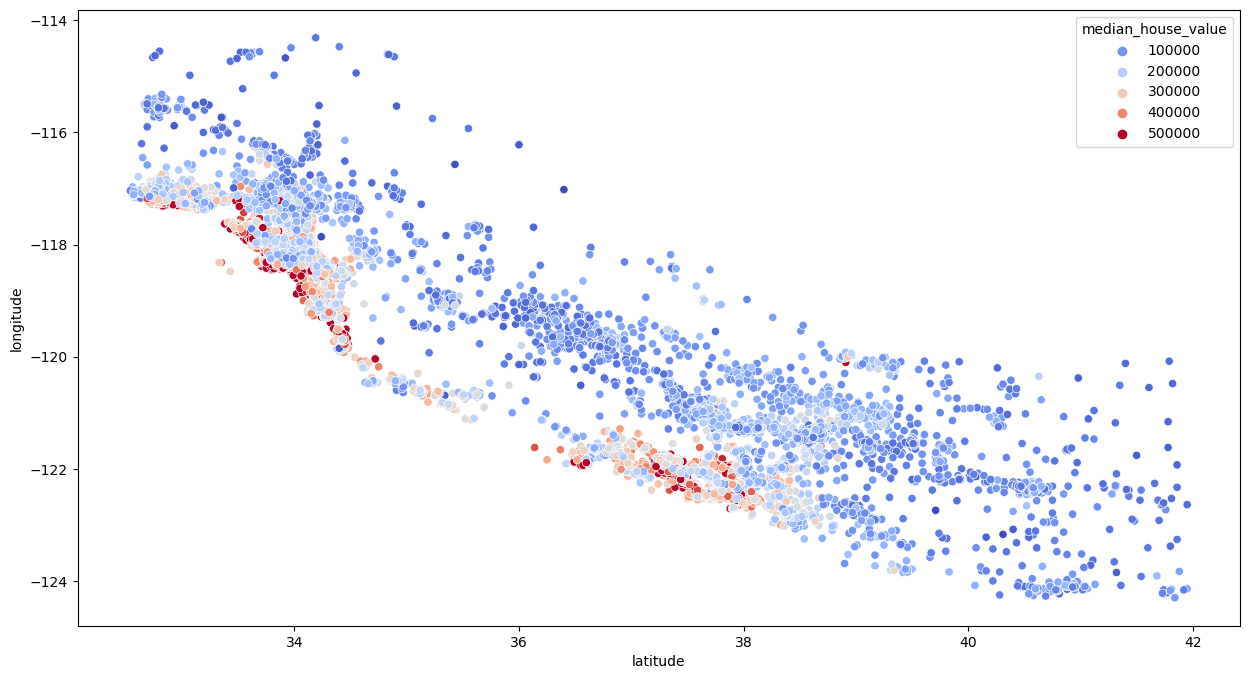

In [23]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'latitude', y='longitude', data = train_data, hue='median_house_value', palette='coolwarm')

In [24]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

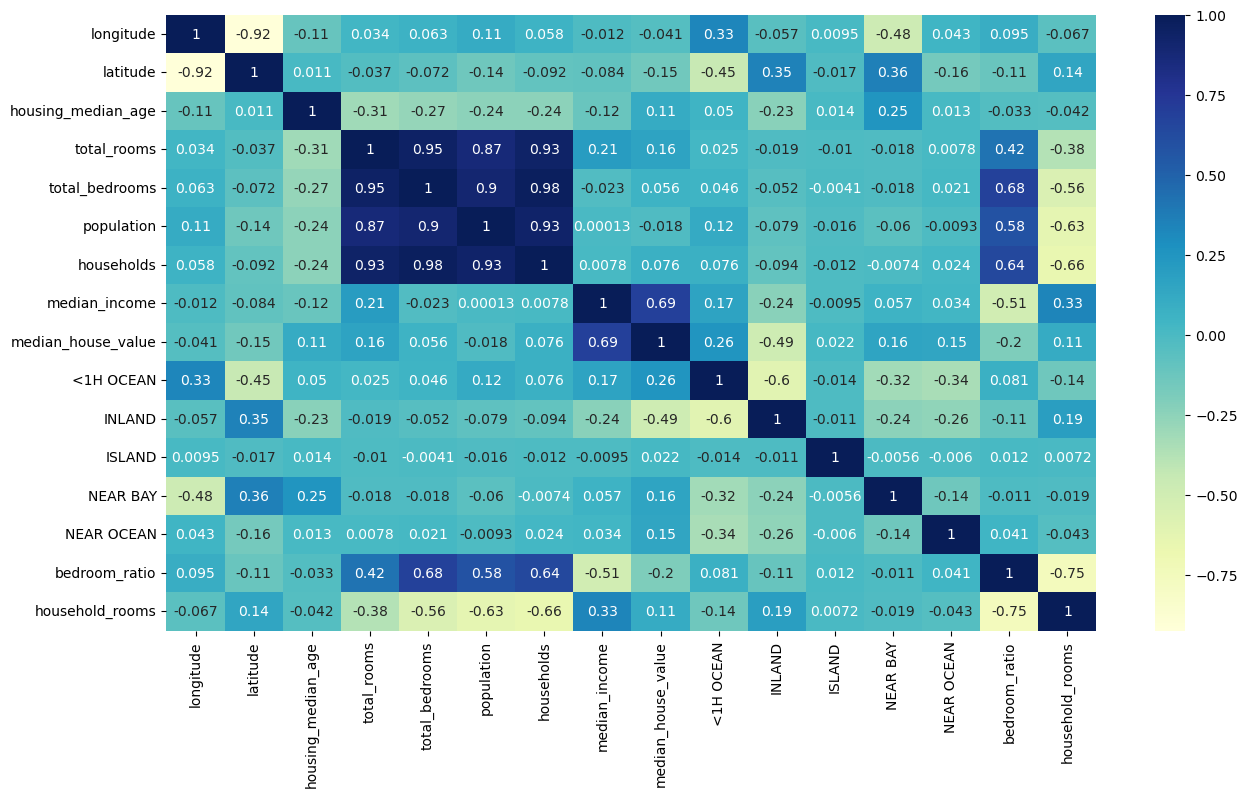

In [25]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x_train, y_train = train_data.drop(['median_house_value'], axis=1),train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [27]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [28]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1),test_data['median_house_value']

In [29]:
x_test_s = scaler.transform(x_test)

In [30]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6795,-118.14,34.08,24.0,8.291296,7.002156,7.975908,6.942157,2.7036,170000.0,1,0,0,0,0,0.844519,1.194340
2347,-119.68,36.80,7.0,7.957177,6.251904,7.466799,6.212606,4.2066,88400.0,0,1,0,0,0,0.785694,1.280811
15434,-117.25,33.21,13.0,7.093405,5.680173,6.943122,5.683580,2.6339,117000.0,1,0,0,0,0,0.800768,1.248052
12009,-117.55,33.92,24.0,7.940228,6.218600,7.410952,6.234411,4.8167,163300.0,0,1,0,0,0,0.783177,1.273613
2217,-119.83,36.83,14.0,7.763021,5.834811,7.029088,5.897154,6.9903,141200.0,0,1,0,0,0,0.751616,1.316401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20257,-119.16,34.20,35.0,7.688913,6.456770,8.161946,6.436150,1.9704,160300.0,0,0,0,0,1,0.839751,1.194645
14684,-117.08,32.83,7.0,9.525443,7.763446,8.399985,7.526718,6.4335,260600.0,1,0,0,0,0,0.815022,1.265551
4427,-118.25,34.07,16.0,6.579251,5.420535,6.687109,5.389072,2.3942,133300.0,1,0,0,0,0,0.823883,1.220851
8053,-118.19,33.84,24.0,7.113956,5.771441,6.287859,5.613128,2.2500,192000.0,0,0,0,0,1,0.811284,1.267378


In [31]:
reg.score(x_test, y_test)

0.6586967662617351

In [35]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [34]:
forest.score(x_test_s,y_test)

0.8198703383794442

In [51]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
    
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring = "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

KeyboardInterrupt: 

In [42]:
best_forest = grid_search.best_estimator_

In [44]:
best_forest.score(x_test_s, y_test)

0.8155536876307402

In [ ]:
grid_search